<h1 style="font-family:Arial ;">📽️ 🎞️ Netflix TV Shows and Movies data - EDA</h1>

<h3 style="font-family:Arial ;">Netflix is a subscription-based streaming service that allows our members to watch TV shows and movies without commercials on an internet-connected device.</h3>

![Netflix](https://www.edigitalagency.com.au/wp-content/uploads/Netflix-logo-red-black-png.png)

<h1 style="font-family:Arial ;"><a href='https://www.kaggle.com/datasets/shivamb/netflix-shows'>Dataset</a></h1>
<h4 style="font-family:Arial ;">This dataset contains data about TV shows and Movies available on Netflix.  <br><br><b>Note</b> : Data available upto 25th September 2021</h4>

<hr>

<h1 style="font-family:Arial ;">❓ Too many questions on mind?🧠❓ <br> <br>➡️ Let's get started!!</h1>

In [1]:
#Importing the package
import pandas as pd
from textblob import TextBlob
from matplotlib import pyplot as plt
pd.set_option('mode.chained_assignment', None)

In [2]:
#Reading the database
df = pd.read_csv('../input/netflix-shows/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
#Rows vs Columns
df.shape

(8807, 12)

In [4]:
#More details about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<h3 style="font-family:Arial ;">Basic data pre-processing :</h3>

In [5]:
#Check null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
#fill null values
df.fillna('NA',inplace=True)

#check if any null values is present
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [7]:
#Check for duplicated values
df.duplicated().unique()

array([False])

In [8]:
#Check values in type columns
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [9]:
#Check values in release_year columns
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [10]:
#Converting rating to meaningful description
#Thanks to source : https://gopioneer.com/wp-content/uploads/2017/01/dtv_movieratings.pdf

df['rating'].replace(to_replace='TV-MA' , value='TV Mature Audience Only', inplace=True)
df['rating'].replace(to_replace='TV-14' , value='Parents Strongly Cautioned', inplace=True)
df['rating'].replace(to_replace='TV-PG' , value='Parental Guidance Suggested', inplace=True)
df['rating'].replace(to_replace='R' , value='Restricted', inplace=True)
df['rating'].replace(to_replace='PG-13' , value='Parents Strongly Cautioned', inplace=True)
df['rating'].replace(to_replace='TV-Y7' , value='Directed to Older Children', inplace=True)
df['rating'].replace(to_replace='TV-Y' , value='All Children', inplace=True)
df['rating'].replace(to_replace='PG' , value='Parental Guidance Suggested', inplace=True)
df['rating'].replace(to_replace='TV-G' , value='General Audience', inplace=True)
df['rating'].replace(to_replace='G' , value='General Audience', inplace=True)
df['rating'].replace(to_replace='TV-Y7-FV' , value='Directed to Older Children', inplace=True)
df['rating'].replace(to_replace='NC-17' , value='No Children 17 or Under', inplace=True)
df['rating'].replace(to_replace=['UR','NR','NA'] , value='Unrated', inplace=True)
df.loc[df['rating'].str.contains(' min'), 'rating'] = 'Unrated'

df['rating'].unique()

array(['Parents Strongly Cautioned', 'TV Mature Audience Only',
       'Parental Guidance Suggested', 'All Children',
       'Directed to Older Children', 'Restricted', 'General Audience',
       'No Children 17 or Under', 'Unrated'], dtype=object)

In [11]:
#Getting useful information from columns
df['show_id'] = df.show_id.str[1:]

#Convert date column to datetime
df_date= df[(df['date_added']!='NA')][['show_id','date_added','type','description']]
df_date['date_added'] = pd.to_datetime(df_date['date_added'])

#Convert date column to week day,month,year
df_date['day_added'] = df_date['date_added'].dt.day_name()
df_date['month_added'] = df_date['date_added'].dt.month_name()
df_date['year_added'] = df_date['date_added'].dt.year

In [12]:
#Changing data types
df = df.astype({'show_id':int,'type':'category'})

#Less memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   int64   
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      8807 non-null   object  
 4   cast          8807 non-null   object  
 5   country       8807 non-null   object  
 6   date_added    8807 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8807 non-null   object  
 9   duration      8807 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(1), int64(2), object(9)
memory usage: 765.7+ KB


<hr>

<h3 style="font-family:Arial ;">✅ Movies vs TV Shows</h3>

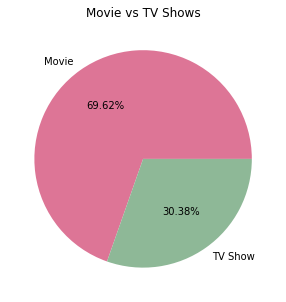

In [13]:
#Movies Vs TV Shows
xy = df['type'].value_counts()
x = xy.index
y = xy.values
plt.figure(figsize=(5, 5))
plt.pie(y,labels=x,colors=[ '#DD7596', '#8EB897'],autopct='%1.2f%%')
plt.title("Movie vs TV Shows")
plt.show()


 <h4 style="font-family:Arial ;">Looking at above chart, we can say Netflix has more movies than twice the number of TV shows.</h4>

<hr>

<h3 style="font-family:Arial ;">✅ Which country produces the most content on Netflix?</h3>

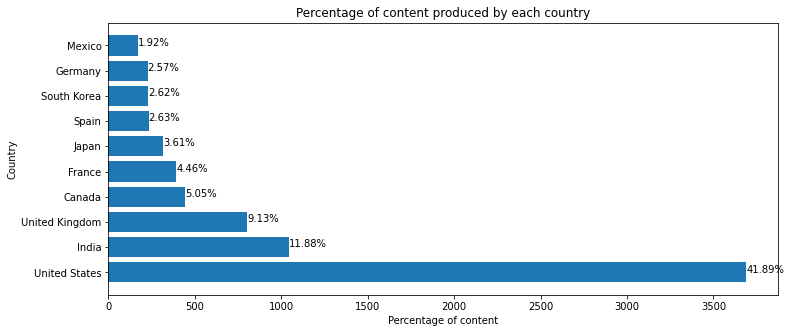

In [14]:
#Top 10 countries with most releases on netflix
df_country = df[df['country']!='NA'][['country','type']]

#total no. of rows
total = df.count().show_id 
xy = df_country['country'].str.split(', ').explode().value_counts().nlargest(10)
x = xy.index
y = xy.values
fig = plt.figure(figsize=(12, 5))
plt.barh(x, y)
for index, value in enumerate(y):
    #Divide by total number to get percentage
    plt.text(value, index, str(round(value*100/total,2))+'%')
plt.xlabel("Percentage of content")
plt.ylabel("Country")
plt.title("Percentage of content produced by each country")
plt.show()

 <h4 style="font-family:Arial ;">United states produces more than 40%(3500+) content</h4>

<hr>

 <h3 style="font-family:Arial ;">✅ On which day of the week Netflix adds content the most?</h3>

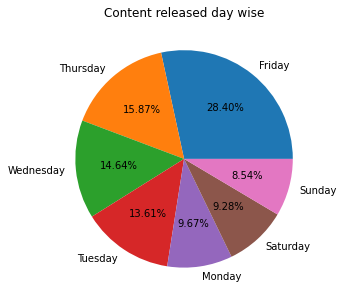

In [15]:
#Content release per week day
xy = df_date['day_added'].value_counts()
x = xy.index
y = xy.values
plt.figure(figsize=(5, 5))
plt.pie(y,labels=x,autopct='%1.2f%%')
plt.title("Content released day wise")
plt.show()

 <h4 style="font-family:Arial ;">Undoubtedly, Friday is everyone's favourite for binge watching. More than 1/4th of content is released on Friday(Weekend is on !!)</h4>

<hr>

 <h3 style="font-family:Arial ;">✅ Which month has the most content releases(add on netflix)?</h3>

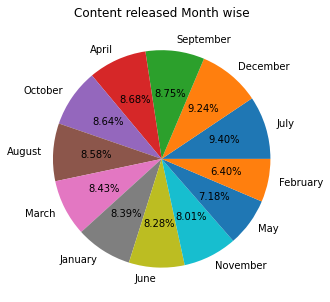

In [16]:
#Content released per month
xy = df_date['month_added'].value_counts()
x = xy.index
y = xy.values
plt.figure(figsize=(5, 5))
plt.pie(y,labels=x,autopct='%1.2f%%')
plt.title("Content released Month wise")
plt.show()

 <h4 style="font-family:Arial ;">July and December are favourite for content release.</h4>

<hr>

 <h3 style="font-family:Arial ;">✅ How content release is increasing/decreasing year by year? In which year most of the content was released? (Release - add on netflix)</h3>

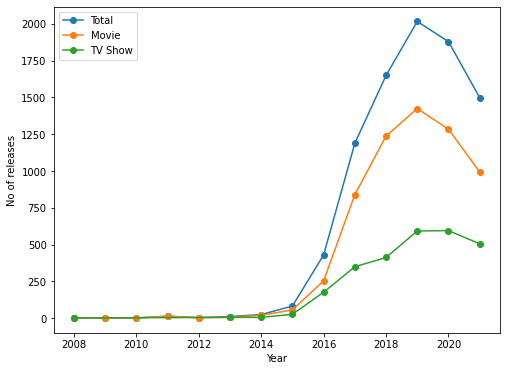

In [17]:
#Content released per year
xy = df_date['year_added'].value_counts().sort_index()
xy1 = df_date[df_date['type']=='Movie']['year_added'].value_counts().sort_index()
xy2 = df_date[df_date['type']=='TV Show']['year_added'].value_counts().sort_index()

plt.figure(figsize=(8,6))
plt.plot(xy.index,xy.values,marker='o',label='Total')
plt.plot(xy1.index,xy1.values,marker='o',label='Movie')
plt.plot(xy2.index,xy2.values,marker='o',label='TV Show')
plt.xlabel("Year")
plt.ylabel("No of releases")
plt.legend()
plt.show()

* <h4 style="font-family:Arial ;">Releases are increasing since 2014,but saw a drop after 2019(might be due to Covid)</h4>
* <h4 style="font-family:Arial ;">Most content released in 2019(during Covid) to engage people at home</h4>

<hr>

<h3 style="font-family:Arial ;">✅ What is sentimental analysis of stories of content?</h3>

In [18]:
#Sentimental analysis of description of content
df_sentiment=df[['release_year','description']]
df_sentiment=df_sentiment.rename(columns={'release_year':'Release Year'})
for index,row in df_sentiment.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==1:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    df_sentiment.loc[[index,2],'Sentiment']=sent
    
df_sentiment=df_sentiment.groupby(['Release Year','Sentiment']).size().reset_index(name='Total')

#
df_sentiment=df_sentiment[df_sentiment['Release Year']>=2010]

<AxesSubplot:xlabel='Release Year'>

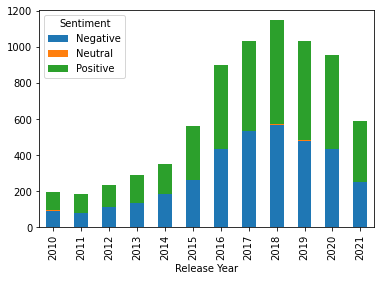

In [19]:
df_sentiment = pd.pivot_table(df_sentiment, values = 'Total', index='Release Year', columns = 'Sentiment')
df_sentiment.plot.bar(stacked=True)

<h4 style="font-family:Arial ;">There is slightly little more positive content than negative one.</h4>

<hr>

<h3 style="font-family:Arial ;">✅ Which type of content is available the most(as per Maturity Ratings)?</h3>

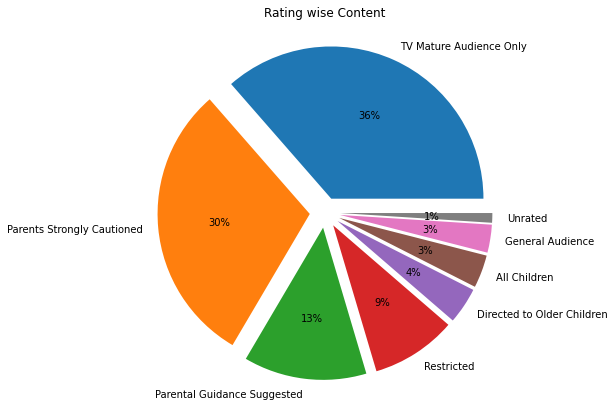

In [20]:
#Grouping the content based on their ratings
xy = df['rating'].value_counts().nlargest(8)
x = xy.index
y = xy.values
plt.figure(figsize=(7, 7))
plt.pie(y,labels=x,autopct='%1.0f%%',explode = tuple([0.1 for i in range(8)]))
plt.title("Rating wise Content")
plt.show()

<h4 style="font-family:Arial ;">As per chart, most of the content is for Matured Audience(Adults)</h4>

<hr>

<h3 style="font-family:Arial ;">✅ Which genre content is most available on Netflix?</h3>

In [21]:
#Content listings - Genres
df_listing = df['listed_in'].str.split(',')

#split all the genres and divide by total no of contents
xy = round(df_listing.explode().str.strip().value_counts().nlargest(5)*100/(df.count().show_id),2)
xy

International Movies      31.25
Dramas                    27.56
Comedies                  19.01
International TV Shows    15.34
Documentaries              9.87
Name: listed_in, dtype: float64

<h4 style="font-family:Arial ;">This is percentage of overall content.</h4>
<h4 style="font-family:Arial ;">International Movies, Dramas,Comedies are the top 3 genres.</h4>

<hr>

<h3 style="font-family:Arial ;">What is duration analysis of Movies?</h3>

In [22]:
df_movies = df[((df['duration'].str.contains('min')) & (df['type']=='Movie'))]
df_movies['duration'] = df_movies['duration'].str.replace(' min','').astype(int)
df_movies.describe()

,show_id,release_year,duration
count,6128.000000,6128.000000,6128.000000
mean,4622.615862,2013.121084,99.577187
std,2581.341433,9.680300,28.290593
min,1.000000,1942.000000,3.000000
25%,2353.500000,2012.000000,87.000000
50%,4790.500000,2016.000000,98.000000
75%,6882.250000,2018.000000,114.000000
max,8807.000000,2021.000000,312.000000


* <h4 style="font-family:Arial ;">Average running time(duration) of movies : 100 min(1H40M)</h4> 
* <h4 style="font-family:Arial ;">Shortest movie is of 3 min</h4> 
* <h4 style="font-family:Arial ;">Longest movie is of 312 min(5H2M)</h4> 
* <h4 style="font-family:Arial ;">Netflix has movies from year range 1942-2021</h4> 

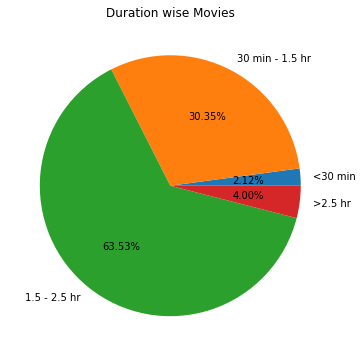

In [23]:
df_movies['duration'] = pd.cut(df_movies['duration'], [0,30,90,150,500], labels=['<30 min','30 min - 1.5 hr','1.5 - 2.5 hr','>2.5 hr'])
xy = df_movies.groupby('duration').size()
x = xy.index
y = xy.values
plt.figure(figsize=(6, 6))
plt.pie(y,labels=x,autopct='%1.2f%%')
plt.title("Duration wise Movies")
plt.show()

* <h4 style="font-family:Arial ;">Most of the movies have running time between 90 min to 150 min</h4> 
* <h4 style="font-family:Arial ;">Very less number of short films/movies(less than 30min)</h4> 
* <h4 style="font-family:Arial ;">Also, less number of long movies(150min+)</h4> 

<hr>

<h3 style="font-family:Arial ;">✅ Which TV show on Netflix have highest number of seasons?</h3> 

In [24]:
df_tvshows = df[df['duration'].str.contains('Season')]
df_tvshows.groupby('duration').size().reset_index()

,duration,0
0,1 Season,1793
1,10 Seasons,7
2,11 Seasons,2
3,12 Seasons,2
4,13 Seasons,3
5,15 Seasons,2
6,17 Seasons,1
7,2 Seasons,425
8,3 Seasons,199
9,4 Seasons,95


> After looking above data, we can TV show with highest seasons have 17 Seasons. Let's find out which show is this?

In [25]:
df[df['duration']=='17 Seasons']['title']

548    Grey's Anatomy
Name: title, dtype: object

* <h4 style="font-family:Arial ;">Grey's Anatomy has highest number of seasons(17)</h4> 

<hr>

<h3 style="font-family:Arial ;">✅ Top 10 Movie directors on Netflix</h3>

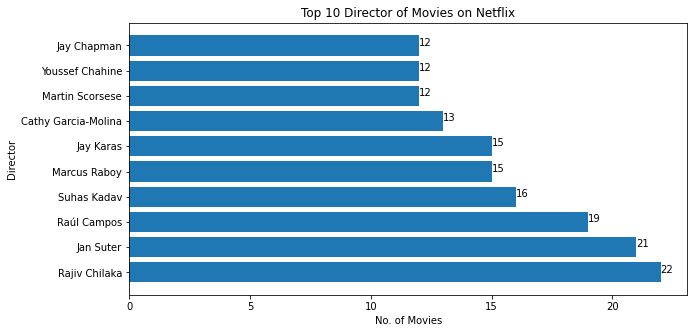

In [26]:
#split director names
df_directors = df[(df['director']!='NA') & (df['type']=='Movie')]['director'].str.split(',')
#converting into new rows and count
xy = df_directors.explode().str.strip().value_counts().nlargest(10)
x = xy.index
y = xy.values
fig = plt.figure(figsize=(10, 5))
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.xlabel("No. of Movies")
plt.ylabel("Director")
plt.title("Top 10 Director of Movies on Netflix")
plt.show()

<h4 style="font-family:Arial ;"><a href='https://en.wikipedia.org/wiki/Rajiv_Chilaka'>Rajiv Chilaka</a> is Top director with most number of movies.</h3> 

<hr>

<h3 style="font-family:Arial ;">✅ Top 10 cast with most content on Netflix</h3> 

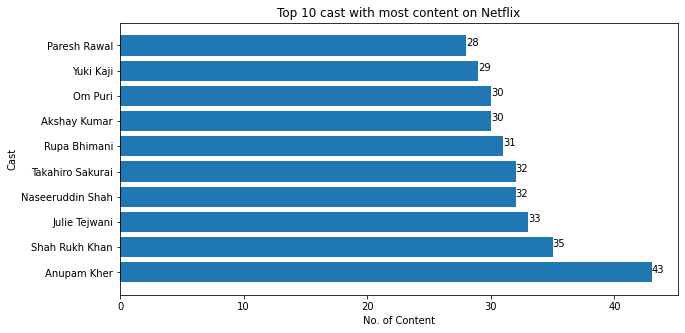

In [27]:
#Top 10 cast with most content on Netflix
df_cast = df[(df['cast']!='NA')]['cast'].str.split(',')

xy = df_cast.explode().str.strip().value_counts().nlargest(10)
x = xy.index
y = xy.values
fig = plt.figure(figsize=(10, 5))
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.xlabel("No. of Content")
plt.ylabel("Cast")
plt.title("Top 10 cast with most content on Netflix")
plt.show()

* <h4 style="font-family:Arial ;"><a href='https://en.wikipedia.org/wiki/Anupam_Kher'>Anupam Kher</a> is Top cast of Netflix</h4> 

<hr>

<h3 style="font-family:Arial ;"> ❓ Any question left to be answered?</h3> 
<h3 style="font-family:Arial ;"> ⭐ Feedback or reviews?</h3> 
<h3 style="font-family:Arial ;"> ✍️ Write down in the comments...</h3>
<br>
<h3 style="font-family:Arial ;"> If you really liked it, do upvote!⬆️</h3>
<hr>
<h3 style="font-family:Arial ;"> Thank you so much for your time!❤️❤️❤️</h3>


